# Loan Approval Data Analytics & Machine Learning Algorithms

## Session 1: Import Basic Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

raw_borrow = pd.read_csv("ds-borrower.csv", delim_whitespace=True)
raw_credit = pd.read_csv("ds-credit.tsv", delim_whitespace=True, header=None, names=["CID", "CheckAcc", "Debt", "SavAcc", "App"])
raw_app = pd.read_csv("ds-app.tsv", delim_whitespace=True, header=None, names=["CID", "DebtLength", "Reason", "Amt", "Int", "CoApp"])
raw_result = pd.read_csv("ds-result.tsv", delim_whitespace=True, header=None, names=["CID", "Approved"])

## Session 2: Cleaning & EDA

In [2]:
print(raw_borrow.head())
print(raw_credit.head())
print(raw_app.head())
print(raw_result.head())

     Emp Mvd Age   Home   CurEmp  Dep
765    1   1  46   rent  skilled  1.0
668    4   4  49  owned  skilled  1.0
68   10+   4  57   rent  skilled  1.0
805    4   2  41  owned  skilled  1.0
495    7   4  24   rent  skilled  1.0
   CID CheckAcc     Debt SavAcc  App
0  374     debt     paid   some    2
1  346     some  delayed   none    1
2  345     some     paid   none    1
3  243     some  delayed   some    1
4  662     debt  delayed   some    2
   CID  DebtLength Reason   Amt  Int CoApp
0  741          36  goods  9566    2  none
1  439          12  goods  2279    4  none
2  501          30   auto  3857    4  none
3  147          12   auto   900    4  none
4  821           6  goods  1898    1  none
  CID Approved
0   1        Y
1   2        Y
2   3        N
3   4        Y
4   5        Y


In [3]:
raw_borrow = raw_borrow.reset_index(level=0)
raw_borrow.rename(columns={"index":"CID", "Emp":"YearCurEmp", "Mvd":"YearCurHome", "Dep":"Dependent"}, inplace=True)
raw_borrow.head()

,CID,YearCurEmp,YearCurHome,Age,Home,CurEmp,Dependent
0,765,1,1,46,rent,skilled,1.0
1,668,4,4,49,owned,skilled,1.0
2,68,10+,4,57,rent,skilled,1.0
3,805,4,2,41,owned,skilled,1.0
4,495,7,4,24,rent,skilled,1.0


In [4]:
rresult = raw_result[:]
rborrower = raw_borrow[:]
rcredit = raw_credit[:]
rapp = raw_app[:]

In [5]:
print(rborrower["YearCurEmp"].unique())
print(rborrower["YearCurHome"].unique())
print(rborrower["Age"].unique())
print(rborrower["Home"].unique())
print(rborrower["CurEmp"].unique())
print(rborrower["Dependent"].unique())

['1' '4' '10+' '7' '0' 'Mvd']
['1' '4' '2' '3' 'Age']
['46' '49' '57' '41' '24' '29' '50' '45' '36' '47' '25' '39' '58' '23'
 '35' '31' '44' '43' '48' '63' '21' '38' '26' '28' '27' '20' '53' '33'
 '66' '30' '37' '22' '32' '40' '42' '65' '74' '19' '34' '67' '62' '60'
 '61' '54' 'Home' '64' '70' '59' '51' '52' '56' '55' '68' '75']
['rent' 'owned' 'free' 'CurEmp']
['skilled' 'unskill' 'self' 'none' 'Dep']
[ 1.  2. nan]


In [6]:
rborrower.dropna(inplace=True)

In [7]:
rborrower["Age"] = rborrower["Age"].astype(int)
rborrower.head()

,CID,YearCurEmp,YearCurHome,Age,Home,CurEmp,Dependent
0,765,1,1,46,rent,skilled,1.0
1,668,4,4,49,owned,skilled,1.0
2,68,10+,4,57,rent,skilled,1.0
3,805,4,2,41,owned,skilled,1.0
4,495,7,4,24,rent,skilled,1.0


In [8]:
rresult["Approved"].unique()

array(['Y', 'N', '1', 'WasTheLoanApproved', 'rows)'], dtype=object)

In [9]:
rresult = rresult.replace(to_replace=["WasTheLoanApproved","rows)"], value=np.nan)
rresult.dropna(inplace=True)

### Assume "1" = "Y"

In [10]:
rresult = rresult.replace(to_replace="1", value="Y")

In [11]:
print(rresult.info())
print(rresult.head())
print(rresult.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1500
Data columns (total 2 columns):
CID         1500 non-null object
Approved    1500 non-null object
dtypes: object(2)
memory usage: 35.2+ KB
None
  CID Approved
0   Y        Y
1   2        Y
2   3        N
3   4        Y
4   5        Y
      CID Approved
1496  746        N
1497  747        Y
1498  748        N
1499  749        Y
1500  750        Y


In [12]:
rresult.drop_duplicates(inplace=True)

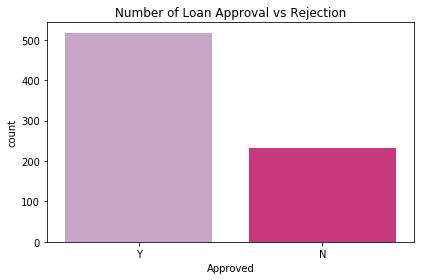

In [13]:
sns.countplot(x = "Approved", data = rresult, palette="PuRd", order = rresult["Approved"].value_counts().index)
plt.title('Number of Loan Approval vs Rejection')
plt.tight_layout()
plt.show()

In [14]:
mergerb = pd.merge(rresult, rborrower, on="CID", how="left")

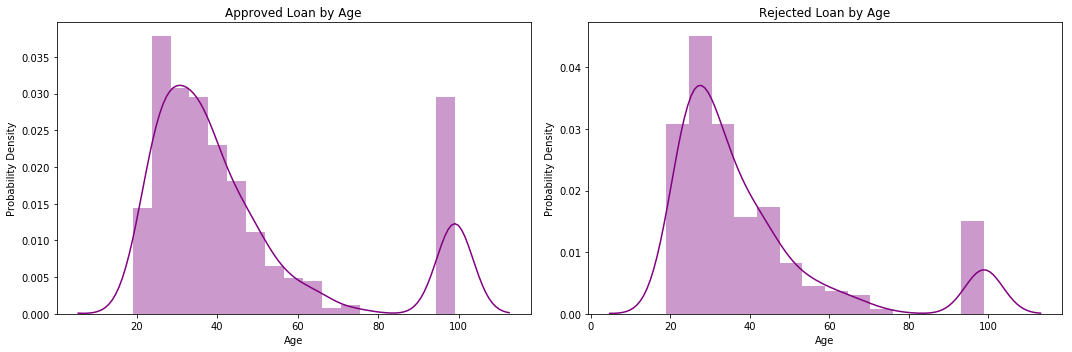

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
mergerb_99 = mergerb.fillna(99)
sns.distplot(mergerb_99[mergerb_99['Approved']=="Y"].Age, color="purple")
plt.title('Approved Loan by Age')
plt.ylabel('Probability Density')
plt.subplot(1, 2, 2)
sns.distplot(mergerb_99[mergerb_99['Approved']=="N"].Age, color="purple")
plt.title('Rejected Loan by Age')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()

In [16]:
mergerb_99['Age_c'] = pd.cut(mergerb_99['Age'], bins = [0, 28, 38, 48, 58, 80, np.inf],
        labels=["<28", "28-38", "38-48", "48-58", "58+", "unknown"])

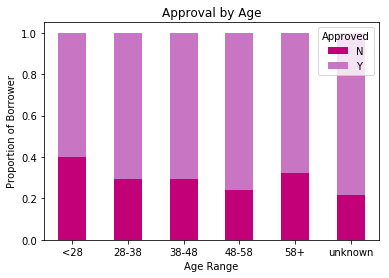

In [17]:
chart = pd.crosstab(mergerb_99.Age_c,mergerb_99.Approved)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid'])
plt.title('Approval by Age')
plt.xlabel('Age Range')
plt.ylabel('Proportion of Borrower')
plt.xticks(rotation=360)
plt.show()

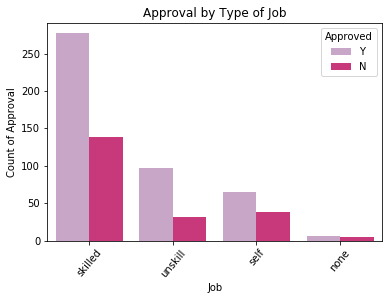

In [18]:
sns.countplot(x="CurEmp", hue="Approved", data=mergerb, palette="PuRd")
plt.title('Approval by Type of Job')
plt.xlabel('Job')
plt.ylabel('Count of Approval')
plt.xticks(rotation=50)
plt.show()

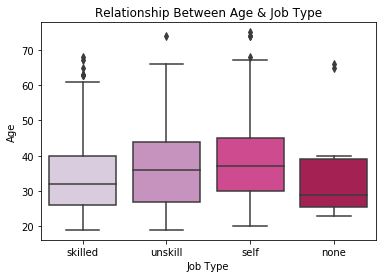

In [19]:
sns.boxplot(x='CurEmp', y='Age', data=mergerb, palette="PuRd")
plt.title('Relationship Between Age & Job Type')
plt.xlabel('Job Type')
plt.ylabel('Age')
plt.show()

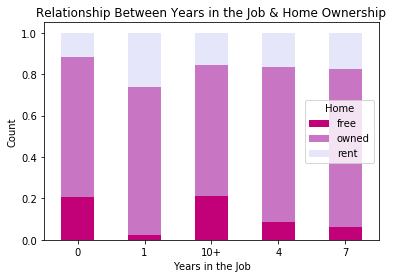

In [20]:
chart = pd.crosstab(mergerb.YearCurEmp,mergerb.Home)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid', 'lavender'])
plt.title('Relationship Between Years in the Job & Home Ownership')
plt.xlabel('Years in the Job')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

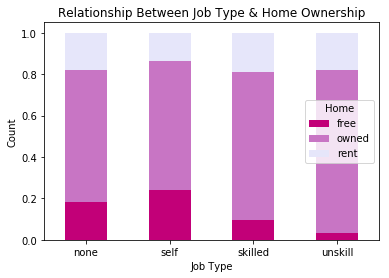

In [21]:
chart = pd.crosstab(mergerb.CurEmp,mergerb.Home)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid', 'lavender'])
plt.title('Relationship Between Job Type & Home Ownership')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

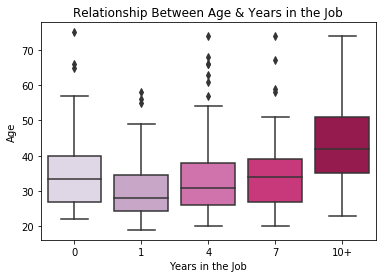

In [22]:
sns.boxplot(x='YearCurEmp', y='Age', data=mergerb, palette="PuRd",order=['0', '1', '4', '7', '10+'])
plt.title('Relationship Between Age & Years in the Job')
plt.xlabel('Years in the Job')
plt.ylabel('Age')
plt.show()

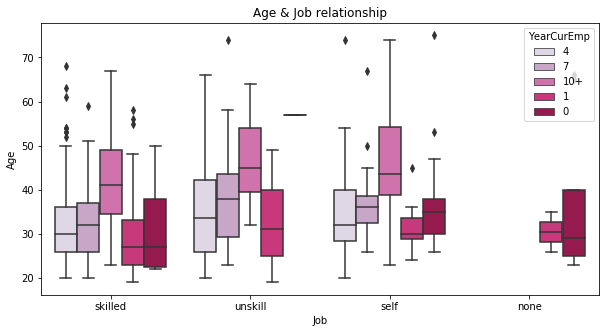

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='CurEmp', y='Age', data=mergerb, palette="PuRd", hue="YearCurEmp")
plt.title('Age & Job relationship')
plt.xlabel('Job')
plt.ylabel('Age')
plt.show()

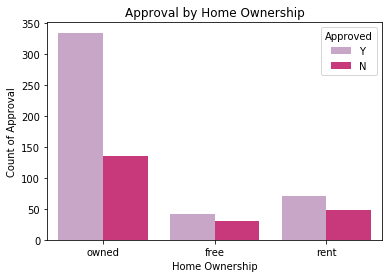

In [24]:
sns.countplot(x="Home", hue="Approved", data=mergerb, palette="PuRd")
plt.title('Approval by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count of Approval')
plt.show()

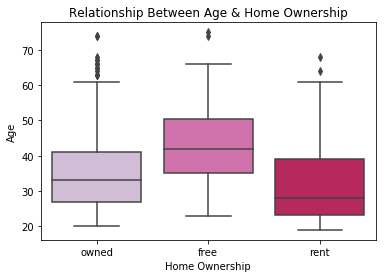

In [25]:
sns.boxplot(x='Home', y='Age', data=mergerb, palette="PuRd")
plt.title('Relationship Between Age & Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Age')
plt.show()

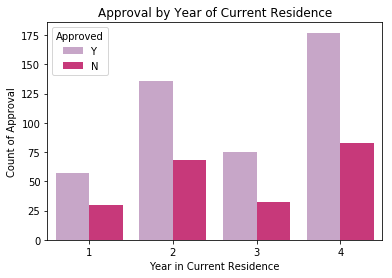

In [26]:
sns.countplot(x="YearCurHome", hue="Approved", data=mergerb, palette="PuRd",order=['1', '2', '3', '4'])
plt.title('Approval by Year of Current Residence')
plt.xlabel('Year in Current Residence')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.show()

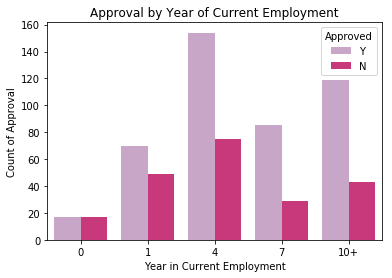

In [27]:
sns.countplot(x="YearCurEmp", hue="Approved", data=mergerb, palette="PuRd",order=['0', '1', '4', '7', '10+'])
plt.title('Approval by Year of Current Employment')
plt.xlabel('Year in Current Employment')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.show()

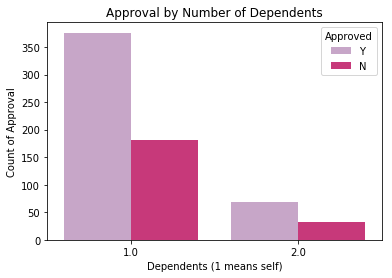

In [28]:
sns.countplot(x="Dependent", hue="Approved", data=mergerb, palette="PuRd")
plt.title('Approval by Number of Dependents')
plt.xlabel('Dependents (1 means self)')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.show()

In [29]:
print(rcredit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 5 columns):
CID         749 non-null int64
CheckAcc    749 non-null object
Debt        749 non-null object
SavAcc      749 non-null object
App         749 non-null int64
dtypes: int64(2), object(3)
memory usage: 29.3+ KB
None


In [30]:
rcredit["CID"] = rcredit["CID"].astype(str)

In [31]:
print(rcredit["CheckAcc"].unique())
print(rcredit["Debt"].unique())
print(rcredit["SavAcc"].unique())
rcredit.isnull().sum()

['debt' 'some' 'none' 'high']
['paid' 'delayed']
['some' 'none' 'high' 'medium' 'v.high']


CID         0
CheckAcc    0
Debt        0
SavAcc      0
App         0
dtype: int64

In [32]:
mergemc = pd.merge(mergerb, rcredit, on="CID", how="left")

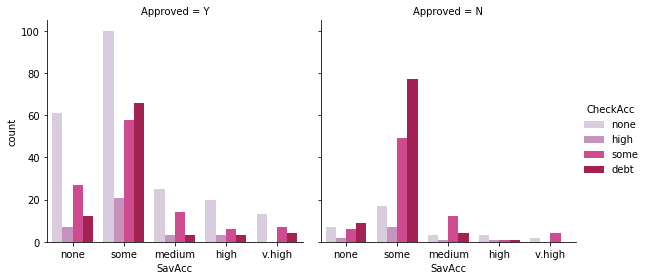

In [33]:
sns.catplot(x="SavAcc", hue="CheckAcc", col="Approved",palette="PuRd", data=mergemc, kind="count", 
            height=4, aspect=1, order=['none', 'some', 'medium', 'high', 'v.high'])

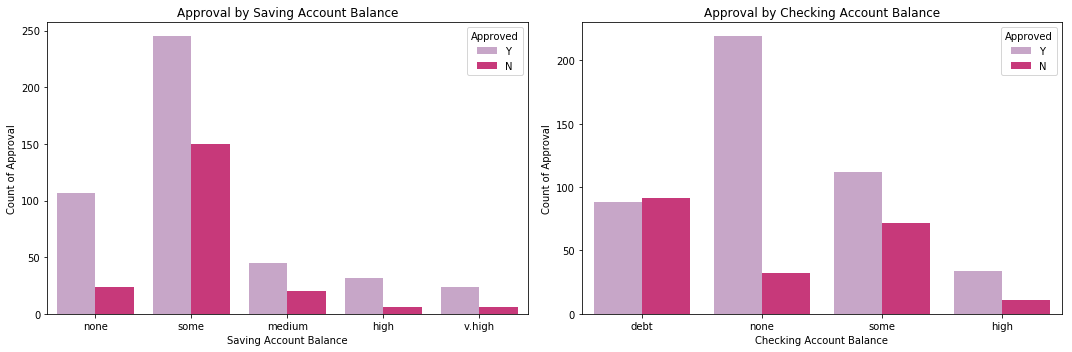

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="SavAcc", hue="Approved", data=mergemc, palette="PuRd",order=['none', 'some', 'medium', 'high', 'v.high'])
plt.title('Approval by Saving Account Balance')
plt.xlabel('Saving Account Balance')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.subplot(1, 2, 2)
sns.countplot(x="CheckAcc", hue="Approved", data=mergemc, palette="PuRd",order=['debt', 'none', 'some', 'high'])
plt.title('Approval by Checking Account Balance')
plt.xlabel('Checking Account Balance')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

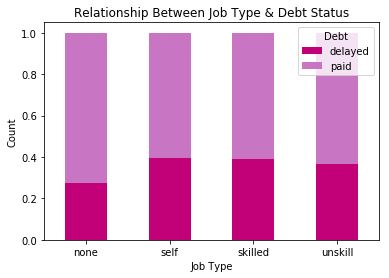

In [35]:
chart = pd.crosstab(mergemc.CurEmp,mergemc.Debt)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid'])
plt.title('Relationship Between Job Type & Debt Status')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

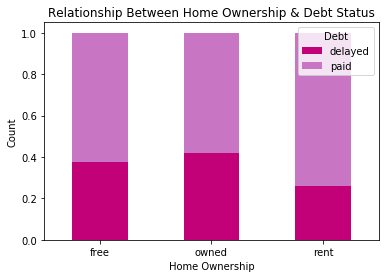

In [36]:
chart = pd.crosstab(mergemc.Home,mergemc.Debt)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid'])
plt.title('Relationship Between Home Ownership & Debt Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

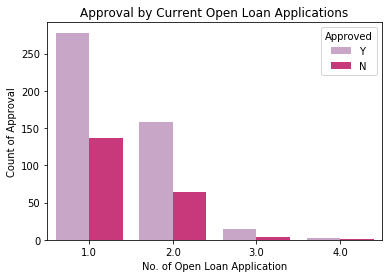

In [37]:
sns.countplot(x="App", hue="Approved", data=mergemc, palette="PuRd")
plt.title('Approval by Current Open Loan Applications')
plt.xlabel('No. of Open Loan Application')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.show()

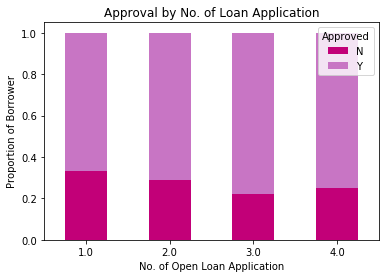

In [38]:
chart = pd.crosstab(mergemc.App,mergemc.Approved)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid'])
plt.title('Approval by No. of Loan Application')
plt.xlabel('No. of Open Loan Application')
plt.ylabel('Proportion of Borrower')
plt.xticks(rotation=360)
plt.show()

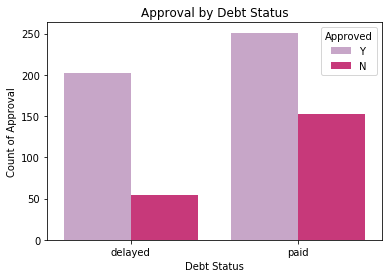

In [39]:
sns.countplot(x="Debt", hue="Approved", data=mergemc, palette="PuRd")
plt.title('Approval by Debt Status')
plt.xlabel('Debt Status')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.show()

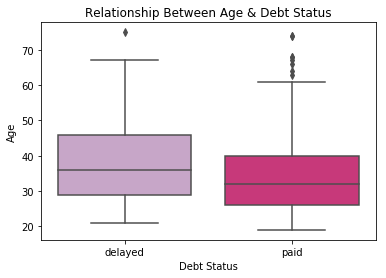

In [40]:
sns.boxplot(x='Debt', y='Age', data=mergemc, palette="PuRd")
plt.title('Relationship Between Age & Debt Status')
plt.xlabel('Debt Status')
plt.ylabel('Age')
plt.show()

In [41]:
print(rapp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
CID           748 non-null int64
DebtLength    748 non-null int64
Reason        748 non-null object
Amt           748 non-null int64
Int           748 non-null int64
CoApp         748 non-null object
dtypes: int64(4), object(2)
memory usage: 35.1+ KB
None


In [42]:
rapp["CID"] = rapp["CID"].astype(str)

In [43]:
rapp.isnull().sum()

CID           0
DebtLength    0
Reason        0
Amt           0
Int           0
CoApp         0
dtype: int64

In [44]:
print(rapp["Reason"].unique())
print(rapp["CoApp"].unique())

['goods' 'auto' 'repairs' 'busin' 'school' 'other']
['none' 'guarant' 'co-app']


In [45]:
mergema = pd.merge(mergemc, rapp, on="CID", how="left")

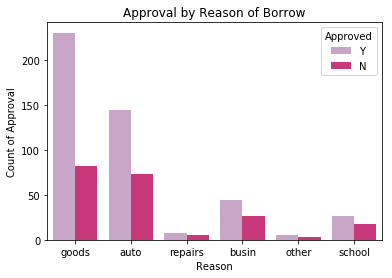

In [46]:
sns.countplot(x="Reason", hue="Approved", data=mergema, palette="PuRd")
plt.title('Approval by Reason of Borrow')
plt.xlabel('Reason')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.show()

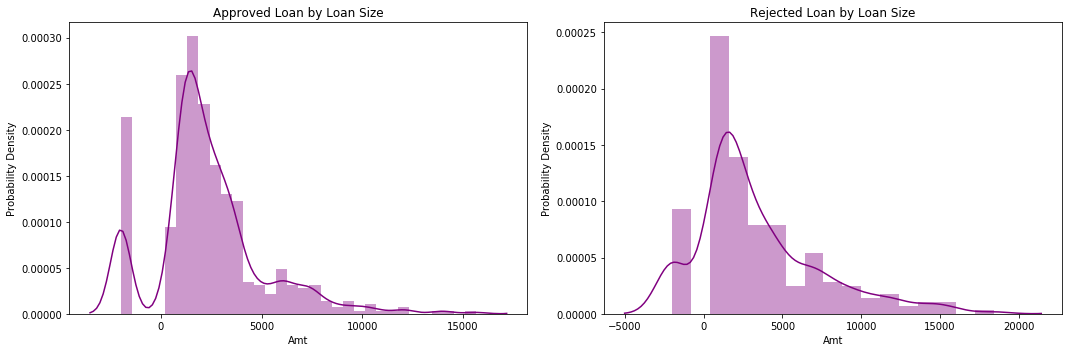

In [47]:
mergema_2k = mergema[:]
mergema_2k['Amt'] = mergema_2k['Amt'].fillna(-2000)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(mergema_2k[mergema_2k['Approved']=="Y"].Amt, color="purple")
plt.title('Approved Loan by Loan Size')
plt.ylabel('Probability Density')
plt.subplot(1, 2, 2)
sns.distplot(mergema_2k[mergema_2k['Approved']=="N"].Amt, color="purple")
plt.title('Rejected Loan by Loan Size')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()

In [48]:
mergema_2k['Amt_c'] = pd.cut(mergema_2k['Amt'], bins = [-2000, 0, 2500, 5000, 7500, 8000, np.inf],
        labels=["unknown", "<$2,500", "$2,500-$5,000", "$5,000-$7,500", "$7,500-$8,000", "$8,000+"])

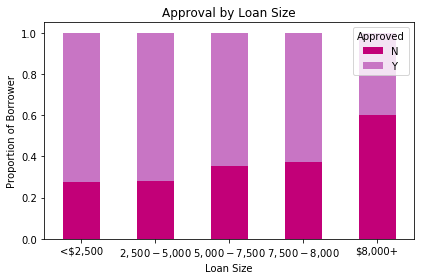

In [49]:
chart = pd.crosstab(mergema_2k.Amt_c,mergema_2k.Approved)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid'])
plt.title('Approval by Loan Size')
plt.xlabel('Loan Size')
plt.ylabel('Proportion of Borrower')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

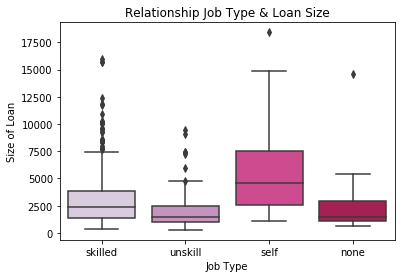

In [50]:
sns.boxplot(x='CurEmp', y='Amt', data=mergema, palette="PuRd")
plt.title('Relationship Job Type & Loan Size')
plt.xlabel('Job Type')
plt.ylabel('Size of Loan')
plt.show()

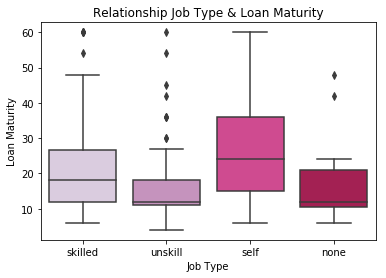

In [51]:
sns.boxplot(x='CurEmp', y='DebtLength', data=mergema, palette="PuRd")
plt.title('Relationship Job Type & Loan Maturity')
plt.xlabel('Job Type')
plt.ylabel('Loan Maturity')
plt.show()

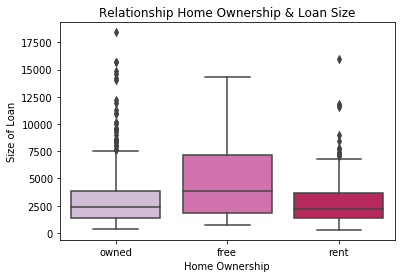

In [52]:
sns.boxplot(x='Home', y='Amt', data=mergema, palette="PuRd")
plt.title('Relationship Home Ownership & Loan Size')
plt.xlabel('Home Ownership')
plt.ylabel('Size of Loan')
plt.show()

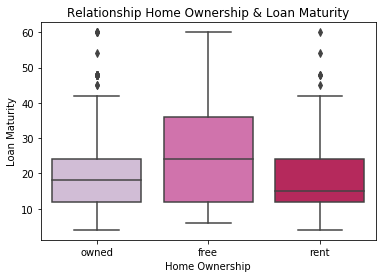

In [53]:
sns.boxplot(x='Home', y='DebtLength', data=mergema, palette="PuRd")
plt.title('Relationship Home Ownership & Loan Maturity')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Maturity')
plt.show()

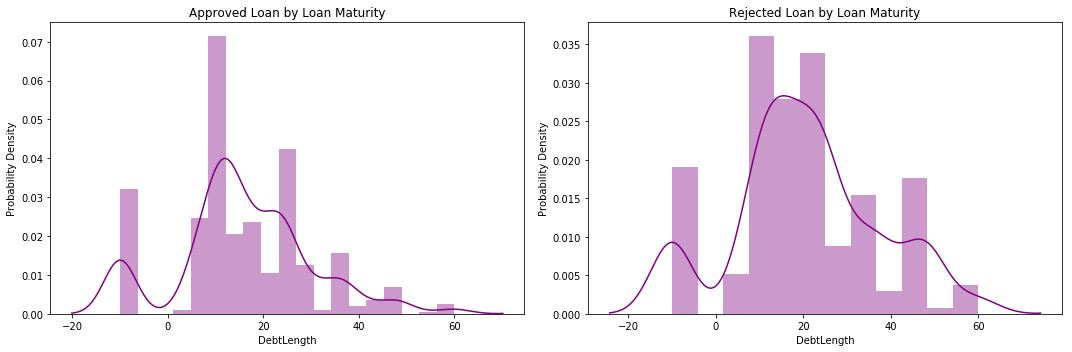

In [54]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
mergema_2k['DebtLength'] = mergema_2k['DebtLength'].fillna(-10)
sns.distplot(mergema_2k[mergema_2k['Approved']=="Y"].DebtLength, color="purple")
plt.title('Approved Loan by Loan Maturity')
plt.ylabel('Probability Density')
plt.subplot(1, 2, 2)
sns.distplot(mergema_2k[mergema_2k['Approved']=="N"].DebtLength, color="purple")
plt.title('Rejected Loan by Loan Maturity')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()

In [55]:
mergema_2k['DebtLength_c'] = pd.cut(mergema_2k['DebtLength'], bins = [0, 12, 18, 24, 36, 48, np.inf],
        labels=["<12", "12-18", "18-24", "24-36", "36-48", "48+"])

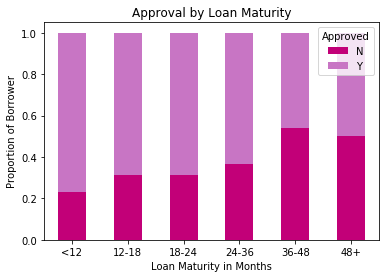

In [56]:
chart = pd.crosstab(mergema_2k.DebtLength_c,mergema_2k.Approved)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid'])
plt.title('Approval by Loan Maturity')
plt.xlabel('Loan Maturity in Months')
plt.ylabel('Proportion of Borrower')
plt.xticks(rotation=360)
plt.show()

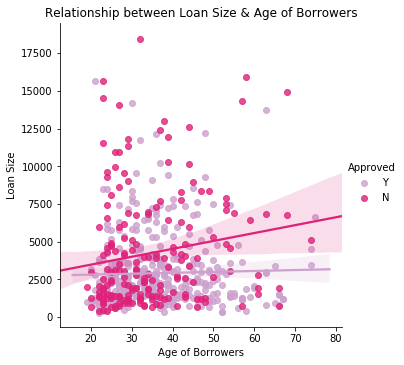

In [57]:
sns.lmplot(x="Age", y="Amt", data=mergema, hue="Approved",palette="PuRd")
plt.title('Relationship between Loan Size & Age of Borrowers')
plt.xlabel('Age of Borrowers')
plt.ylabel('Loan Size')
plt.show()

In [58]:
cor = mergema["Age"].corr(mergema["Amt"])
print("Correlation:", round(cor,4))
cor_n = mergema[mergema['Approved']=='N']['Age'].corr(mergema[mergema['Approved']=='N']['Amt'])
print("Correlation for rejected app:", round(cor_n,4))

Correlation: 0.068
Correlation for rejected app: 0.159


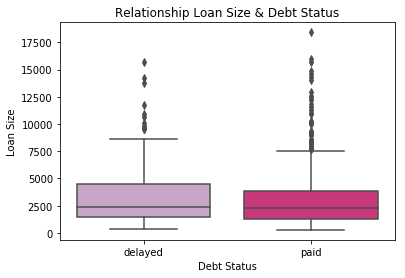

In [59]:
sns.boxplot(x='Debt', y='Amt', data=mergema, palette="PuRd")
plt.title('Relationship Loan Size & Debt Status')
plt.xlabel('Debt Status')
plt.ylabel('Loan Size')
plt.show()

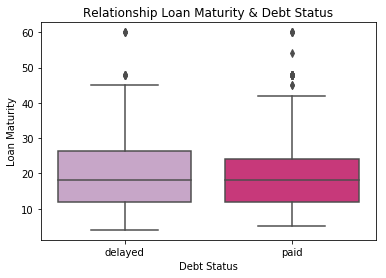

In [60]:
sns.boxplot(x='Debt', y='DebtLength', data=mergema, palette="PuRd")
plt.title('Relationship Loan Maturity & Debt Status')
plt.xlabel('Debt Status')
plt.ylabel('Loan Maturity')
plt.show()

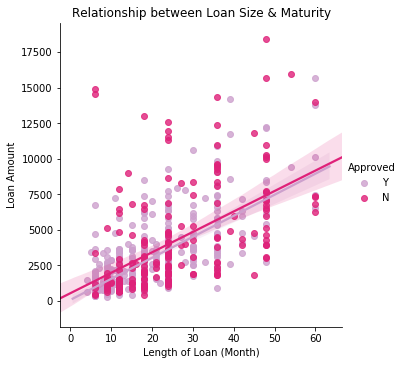

In [61]:
sns.lmplot(x="DebtLength", y="Amt", data=mergema, hue="Approved",palette="PuRd")
plt.title('Relationship between Loan Size & Maturity')
plt.xlabel('Length of Loan (Month)')
plt.ylabel('Loan Amount')
plt.show()

In [62]:
cor = mergema["DebtLength"].corr(mergema["Amt"])
print("Correlation:", round(cor,4))

Correlation: 0.626


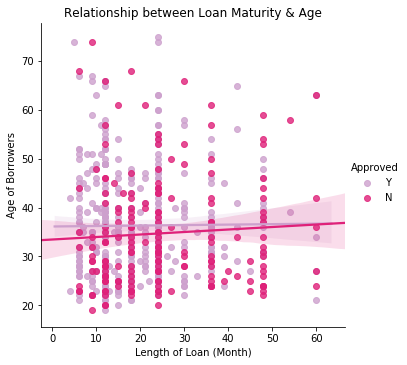

In [63]:
sns.lmplot(x="DebtLength", y="Age", data=mergema, hue="Approved",palette="PuRd")
plt.title('Relationship between Loan Maturity & Age')
plt.xlabel('Length of Loan (Month)')
plt.ylabel('Age of Borrowers')
plt.show()

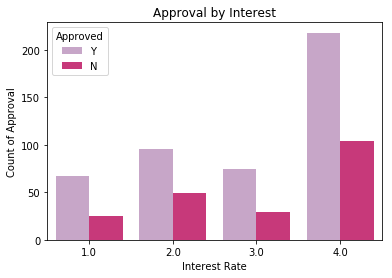

In [64]:
sns.countplot(x="Int", hue="Approved", data=mergema, palette="PuRd")
plt.title('Approval by Interest')
plt.xlabel('Interest Rate')
plt.ylabel('Count of Approval')
plt.xticks(rotation=360)
plt.show()

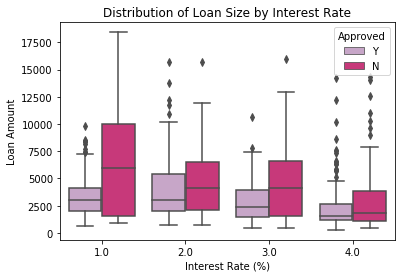

In [65]:
sns.boxplot(x='Int', y='Amt', data=mergema, palette="PuRd", hue="Approved")
plt.title('Distribution of Loan Size by Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Loan Amount')
plt.show()

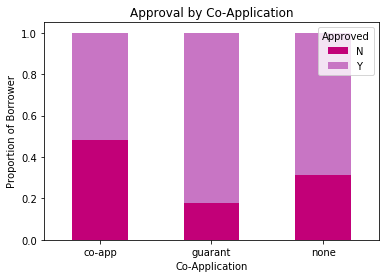

In [66]:
chart = pd.crosstab(mergema.CoApp,mergema.Approved)
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, 
         color=['xkcd:magenta','xkcd:orchid'])
plt.title('Approval by Co-Application')
plt.xlabel('Co-Application')
plt.ylabel('Proportion of Borrower')
plt.xticks(rotation=360)
plt.show()

## Session 3: Preprocessing
### 3.1) Preprocess Borrower Data

#### copy data

In [67]:
result = rresult[:]
borrower = rborrower[:]
credit = rcredit[:]
app = rapp[:]

#### preprocess borrower data

In [68]:
borrower["YearCurEmp"] = borrower["YearCurEmp"].map({'0': 0, '1': 1, '4': 4, '7': 7, '10+': 10})

In [69]:
borrower["YearCurHome"] = borrower["YearCurHome"].astype(int)

In [70]:
borrower = pd.get_dummies(borrower, prefix="Home_", columns=["Home"], drop_first=True)
borrower = pd.get_dummies(borrower, prefix="CurEmp_", columns=["CurEmp"], drop_first=True)

#### correct dependant to exclude self

In [71]:
borrower["Dependent"] = borrower["Dependent"].map({1: 0, 2: 1})

In [72]:
borrower.head()

,CID,YearCurEmp,YearCurHome,Age,Dependent,Home__owned,Home__rent,CurEmp__self,CurEmp__skilled,CurEmp__unskill
0,765,1,1,46,0,0,1,0,1,0
1,668,4,4,49,0,1,0,0,1,0
2,68,10,4,57,0,0,1,0,1,0
3,805,4,2,41,0,1,0,0,1,0
4,495,7,4,24,0,0,1,0,1,0


### 3.2) Preprocess Credit Data

In [73]:
credit = pd.get_dummies(credit, prefix="Debt_", columns=["Debt"], drop_first=True)
credit = pd.get_dummies(credit, prefix="CheckAc_", columns=["CheckAcc"], drop_first=True)
credit = pd.get_dummies(credit, prefix="SavAc_", columns=["SavAcc"], drop_first=True)

In [74]:
credit.head()

,CID,App,Debt__paid,CheckAc__high,CheckAc__none,CheckAc__some,SavAc__medium,SavAc__none,SavAc__some,SavAc__v.high
0,374,2,1,0,0,0,0,0,1,0
1,346,1,0,0,0,1,0,1,0,0
2,345,1,1,0,0,1,0,1,0,0
3,243,1,0,0,0,1,0,0,1,0
4,662,2,0,0,0,0,0,0,1,0


### 3.3) Preprocess  Application Data

In [75]:
print(app["Reason"].unique())
print(app["CoApp"].unique())

['goods' 'auto' 'repairs' 'busin' 'school' 'other']
['none' 'guarant' 'co-app']


In [76]:
app = pd.get_dummies(app, prefix="Rea_", columns=["Reason"], drop_first=True)
app = pd.get_dummies(app, prefix="CoAp_", columns=["CoApp"], drop_first=True)

In [77]:
app.head()

,CID,DebtLength,Amt,Int,Rea__busin,Rea__goods,Rea__other,Rea__repairs,Rea__school,CoAp__guarant,CoAp__none
0,741,36,9566,2,0,1,0,0,0,0,1
1,439,12,2279,4,0,1,0,0,0,0,1
2,501,30,3857,4,0,0,0,0,0,0,1
3,147,12,900,4,0,0,0,0,0,0,1
4,821,6,1898,1,0,1,0,0,0,0,1


### 3.4) Preprocess Result Data

In [78]:
result["Approved"] = result["Approved"].map({"Y": 1, "N": 0})

In [79]:
print(result.info())
result.sort_values("CID").head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 749
Data columns (total 2 columns):
CID         750 non-null object
Approved    750 non-null int64
dtypes: int64(1), object(1)
memory usage: 17.6+ KB
None


,CID,Approved
9,10,1
99,100,1
100,101,1
101,102,1
102,103,0


### 3.5) Merge Data

In [80]:
mergecr = pd.merge(result, credit, on="CID", how="left")
mergebr = pd.merge(mergecr, borrower, on="CID", how="left")
merged = pd.merge(mergebr, app, on="CID", how="left")
merged.head()

,CID,Approved,App,Debt__paid,CheckAc__high,CheckAc__none,CheckAc__some,SavAc__medium,SavAc__none,SavAc__some,...,DebtLength,Amt,Int,Rea__busin,Rea__goods,Rea__other,Rea__repairs,Rea__school,CoAp__guarant,CoAp__none
0,Y,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,9.0,3074.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12.0,939.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,9.0,2507.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,18.0,2238.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [81]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 749
Data columns (total 30 columns):
CID                750 non-null object
Approved           750 non-null int64
App                659 non-null float64
Debt__paid         659 non-null float64
CheckAc__high      659 non-null float64
CheckAc__none      659 non-null float64
CheckAc__some      659 non-null float64
SavAc__medium      659 non-null float64
SavAc__none        659 non-null float64
SavAc__some        659 non-null float64
SavAc__v.high      659 non-null float64
YearCurEmp         658 non-null float64
YearCurHome        658 non-null float64
Age                658 non-null float64
Dependent          658 non-null float64
Home__owned        658 non-null float64
Home__rent         658 non-null float64
CurEmp__self       658 non-null float64
CurEmp__skilled    658 non-null float64
CurEmp__unskill    658 non-null float64
DebtLength         663 non-null float64
Amt                663 non-null float64
Int               

### 3.6) Standardize Data

In [82]:
from sklearn.preprocessing import minmax_scale
merged[["YearCurEmp", "YearCurHome", "Age", "DebtLength", "Amt", "Int"]] = minmax_scale(merged[["YearCurEmp", 
                                                                                                "YearCurHome", "Age", 
                                                                                                "DebtLength", "Amt", "Int"]])

### 3.7) Split Data

In [83]:
from sklearn.model_selection import train_test_split
Y = merged.Approved
X = merged.drop(["Approved", "CID"], axis=1)
seed = 7
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Session 4: Modelling
### 4.1) XGBoost Model

#### model fitting

In [84]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb1 = XGBClassifier()
xgb1.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#### make predictions for test data

In [85]:
Y_pred = xgb1.predict(X_test)
predictions = [round(value) for value in Y_pred]
# evaluate predictions
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))

Y_test_list = Y_test.tolist()
auc_xgb1 = roc_auc_score(Y_test, Y_pred)
print("AUC:", round(auc_xgb1,4))

Accuracy: 74.19%
AUC: 0.6452


In [86]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(xgb1, X_train, Y_train, cv=5, scoring='accuracy')
cv_auc = cross_val_score(xgb1, X_train, Y_train, cv=5, scoring='roc_auc')
print(cv_auc)
print("Cross-Validation Mean AUC: %.2f%%" % (cv_auc.mean()*100))
print(cv_acc)
print("Cross-Validation Mean Accuracy: %.2f%%" % (cv_acc.mean()*100))

[0.66958525 0.74746544 0.74754558 0.80738663 0.69331463]
Cross-Validation Mean AUC: 73.31%
[0.69306931 0.72277228 0.69       0.73       0.66      ]
Cross-Validation Mean Accuracy: 69.92%


### 4.2) Logistic Regression Model
#### remove n/a

In [87]:
merged_dropna = merged.dropna()
y = merged_dropna.Approved
x = merged_dropna.drop(["Approved", "CID"], axis=1)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [89]:
import statsmodels.api as sm
logit1 = sm.Logit(y_train,x_train)
logit1 = logit1.fit()
print (logit1.summary())

Optimization terminated successfully.
         Current function value: 0.456683
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Approved   No. Observations:                  345
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                           27
Date:                Thu, 13 Jun 2019   Pseudo R-squ.:                  0.2730
Time:                        21:01:37   Log-Likelihood:                -157.56
converged:                       True   LL-Null:                       -216.72
                                        LLR p-value:                 2.107e-13
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
App                -0.8280      0.333     -2.484      0.013      -1.481      -0.175
Debt__paid    

In [90]:
y_pred = logit1.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))

y_test_list = y_test.tolist()
auc_logit1 = roc_auc_score(y_test, y_pred)
print("AUC:", round(auc_logit1,4))

Accuracy: 69.41%
AUC: 0.7005


#### check confusion matrix for size of false positive

In [91]:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(y_test, predictions, labels=[0, 1]), 
                   index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes']))

          pred:no  pred:yes
true:no        24        32
true:yes       20        94


#### cross validation

In [92]:
from sklearn.base import BaseEstimator, RegressorMixin
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return [round(value) for value in self.results_.predict(X)]
cv_acc = cross_val_score(SMWrapper(sm.Logit), x_train, y_train, cv=5, scoring='accuracy')
cv_auc = cross_val_score(SMWrapper(sm.Logit), x_train, y_train, cv=5, scoring='roc_auc')
print(cv_auc)
print("Cross-Validation Mean AUC: %.2f%%" % (cv_auc.mean()*100))
print(cv_acc)
print("Cross-Validation Mean Accuracy: %.2f%%" % (cv_acc.mean()*100))

         Current function value: 0.447500
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.445662
         Iterations 19
         Current function value: 0.447725
         Iterations: 35
         Current function value: 0.439651
         Iterations: 35
         Current function value: 0.442832
         Iterations: 35
         Current function value: 0.447500
         Iterations: 35
Optimization terminated successfully.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check


         Current function value: 0.445662
         Iterations 19
         Current function value: 0.447725
         Iterations: 35
         Current function value: 0.439651
         Iterations: 35
         Current function value: 0.442832
         Iterations: 35
[0.66304348 0.63095238 0.65138889 0.68478261 0.6377551 ]
Cross-Validation Mean AUC: 65.36%
[0.73913043 0.71014493 0.71014493 0.71014493 0.69565217]
Cross-Validation Mean Accuracy: 71.30%


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### model revision 1: removing insignifant independent variables

In [93]:
cols = ["App", "Debt__paid", "CheckAc__none", "CurEmp__self", "DebtLength", "Rea__goods","CoAp__guarant"]
logit2 = sm.Logit(y_train,x_train[cols])
logit2 = logit2.fit()
y_pred = logit2.predict(x_test[cols])
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))

y_test_list = y_test.tolist()
auc_logit2 = roc_auc_score(y_test, y_pred)
print("AUC:", round(auc_logit2,4))

Optimization terminated successfully.
         Current function value: 0.541421
         Iterations 6
Accuracy: 69.41%
AUC: 0.7509


In [94]:
cv_auc = cross_val_score(SMWrapper(sm.Logit), x_train[cols], y_train, cv=5, scoring='roc_auc')
cv_acc = cross_val_score(SMWrapper(sm.Logit), x_train[cols], y_train, cv=5, scoring='accuracy')
print(cv_auc)
print("Cross-Validation Mean AUC: %.2f%%" % (cv_auc.mean()*100))
print(cv_acc)
print("Cross-Validation Mean Accuracy: %.2f%%" % (cv_acc.mean()*100))

Optimization terminated successfully.
         Current function value: 0.521953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515428
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508937
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.521059
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.514389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.521953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515428
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508937
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.521059
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.514389
  

### Notes: Other ways to improve the model: Feature engineering or test model with interaction features (PolynomialFeatures)

#### Model revision 2: an simple example of adding interaction effect

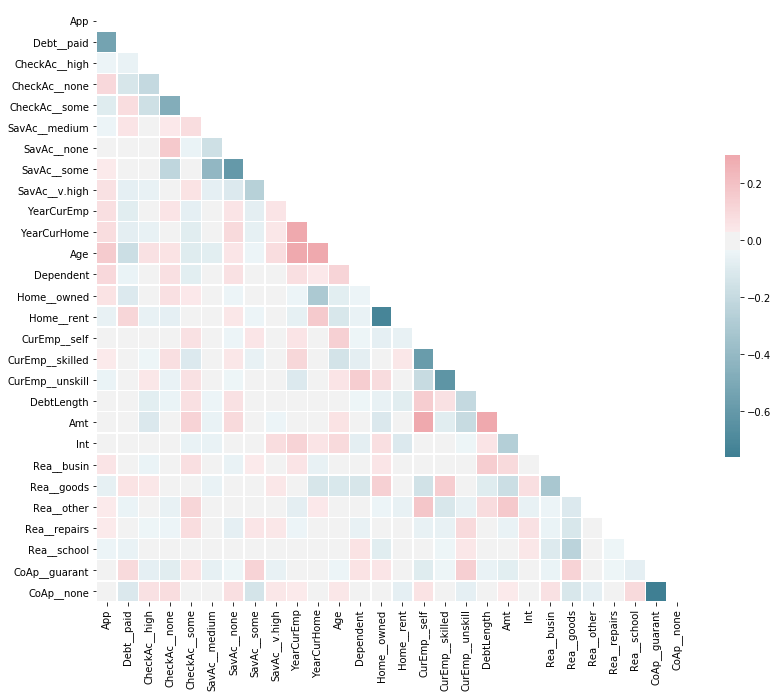

In [95]:
corr = x.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.tight_layout()
plt.xticks(rotation=80) 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [96]:
# based on the correlation plot above, let's try to add two interaction effects
inter_x = x[:]
inter_x["Home_owned_year"]=inter_x["Home__owned"]*inter_x["YearCurHome"]
inter_x["SavAc_some_CheckAc_none"]=inter_x["CheckAc__none"]*inter_x["SavAc__some"]

inter_x_train, inter_x_test, inter_y_train, inter_y_test = train_test_split(inter_x, y, test_size=test_size, random_state=seed)
logit3 = sm.Logit(inter_y_train, inter_x_train)
logit3 = logit3.fit()
print (logit3.summary())

y_pred = logit3.predict(inter_x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))

auc_logit3 = roc_auc_score(inter_y_test, y_pred)
print("AUC:", round(auc_logit3,4))

Optimization terminated successfully.
         Current function value: 0.455989
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Approved   No. Observations:                  345
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                           29
Date:                Thu, 13 Jun 2019   Pseudo R-squ.:                  0.2741
Time:                        21:01:39   Log-Likelihood:                -157.32
converged:                       True   LL-Null:                       -216.72
                                        LLR p-value:                 7.829e-13
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
App                        -0.8463      0.334     -2.537      0.011      -1.500   

### 4.3) Ramdom Forest Model

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 300, random_state=seed)
X_train0 = X_train.fillna('0')
# Train the model on training data
rf1.fit(X_train0, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [98]:
X_test0 = X_test.fillna('0')

Y_pred = rf1.predict(X_test0)
predictions = [round(value) for value in Y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

auc_rf1 = roc_auc_score(Y_test, Y_pred)
print("AUC:", round(auc_rf1,4))

Accuracy: 71.37%
AUC: 0.5969


In [99]:
cv_auc = cross_val_score(rf1, X_train0, Y_train, cv=5, scoring='roc_auc')
cv_acc = cross_val_score(rf1, X_train0, Y_train, cv=5, scoring='accuracy')
print(cv_auc)
print("Cross-Validation Mean AUC: %.2f%%" % (cv_auc.mean()*100))
print(cv_acc)
print("Cross-Validation Mean Accuracy: %.2f%%" % (cv_acc.mean()*100))

[0.71152074 0.75046083 0.75876578 0.80528284 0.70032726]
Cross-Validation Mean AUC: 74.53%
[0.74257426 0.75247525 0.7        0.77       0.67      ]
Cross-Validation Mean Accuracy: 72.70%


In [100]:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(Y_test, predictions, labels=[0, 1]), 
                   index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes']))

          pred:no  pred:yes
true:no        22        56
true:yes       15       155


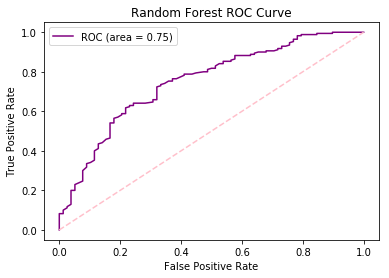

In [101]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fpr, tpr, auc):  
    plt.plot(fpr, tpr, color='purple', label='ROC (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.legend()
    plt.show()

probs = rf1.predict_proba(X_test0)[:, 1]
auc = roc_auc_score(Y_test, probs)
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plot_roc_curve(fpr, tpr, auc) 

### 4.4) Neural Network Model

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [103]:
def create_baseline():
    model = Sequential()
    model.add(Dense(16, input_dim=28, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [104]:
# fit model & evaluate
nn1 = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(nn1, X_train0, Y_train, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Results: 69.96% (4.13%)


In [105]:
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=28, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
nn2 = KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(nn2, X_train0, Y_train, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 68.35% (6.27%)


In [106]:
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=28, kernel_initializer='normal', activation='relu'))
	model.add(Dense(30, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
nn3 = KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(nn3, X_train0, Y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 65.34% (4.53%)


# Thank You for your time!